In [1]:
# AI model to classify space rocks
import matplotlib.pyplot as plt
import numpy as np

Now add code in a new cell to import the PyTorch library to train and process deep learning and AI models. After you add the new code, run the cell.

In [2]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F

The next library to import is torchvision, which is part of PyTorch. You use this library to process images and do manipulations like cropping and resizing. Add this code in a new cell to import the library, and then run the cell.

In [3]:
import torchvision
from torchvision import datasets, transforms, models

Now add code in a new cell to import the **Python Imaging Library** (PIL) so you can visualize the images. After you add the new code, run the cell.

In [4]:
from PIL import Image

Finally, add the following code in a new cell to import two libraries that ensure the plots are shown inline and with high resolution. After you add the new code, run the cell.

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# Tell the machine what folder contains the image data
data_dir = './Data'

# Read the data, crop and resize the images, split data into two groups: test and train
def load_split_train_test(data_dir, valid_size = .2):

    # Transform the images to train the model
    train_transforms = transforms.Compose([
                                       transforms.RandomResizedCrop(224),
                                       transforms.Resize(224),
                                       transforms.ToTensor(),
                                       ])

    # Transform the images to test the model
    test_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                          transforms.Resize(224),
                                          transforms.ToTensor(),
                                      ])

    # Create two variables for the folders with the training and testing images
    train_data = datasets.ImageFolder(data_dir, transform=train_transforms)
    test_data = datasets.ImageFolder(data_dir, transform=test_transforms)

    # Get the number of images in the training folder
    num_train = len(train_data)

    # Create a list of numbers from 0 to the number of training images - 1
    # Example: For 10 images, the variable is the list [0,1,2,3,4,5,6,7,8,9]
    indices = list(range(num_train))

    # If valid_size is .2, find the index of the image that represents 20% of the data
    # If there are 10 images, a split would result in 2
    # split = int(np.floor(.2 * 10)) -> int(np.floor(2)) -> int(2) -> 2
    split = int(np.floor(valid_size * num_train))

    # Randomly shuffle the indices
    # For 10 images, an example would be that indices is now the list [2,5,4,6,7,1,3,0,9,8]
    np.random.shuffle(indices)

    from torch.utils.data.sampler import SubsetRandomSampler

    # With the indices randomly shuffled, 
    # grab the first 20% of the shuffled indices, and store them in the training index list
    # grab the remainder of the shuffled indices, and store them in the testing index list
    # Given our example so far, this would result is:
    # train_idx is the list [1,5] 
    # test_idx is the list [4,6,7,1,3,0,9,8]
    train_idx, test_idx = indices[split:], indices[:split]

    # Create samplers to randomly grab items from the training and testing indices lists
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)

    # Create loaders to load 16 images from the train and test data folders
    # Images are chosen based on the shuffled index lists and by using the samplers
    trainloader = torch.utils.data.DataLoader(train_data, sampler=train_sampler, batch_size=16)
    testloader = torch.utils.data.DataLoader(test_data, sampler=test_sampler, batch_size=16)

    # Return the loaders so you can grab images randomly from the training and testing data folders
    return trainloader, testloader

# Using the function that shuffles images,
# create a trainloader to load 20% of the images
# create a testloader to load 80% of the images
trainloader, testloader = load_split_train_test(data_dir, .2)

# Print the type of rocks that are included in the trainloader
print(trainloader.dataset.classes)

['Basalt', 'Highland']


In [7]:
# Transform an image into pixels and resize it
test_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                   transforms.Resize(224),
                                   transforms.ToTensor(),
                                 ])

# Randomly select a set of images by using a similar approach as the load_split_train_test function
def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, sampler=sampler, batch_size=num)

    # Create an iterator to iterate over the shuffled images in the test image dataset
    dataiter = iter(loader)

    # Get and return the images and labels from the iterator
    images, labels = next(dataiter)
    return images, labels

In [8]:
# Transform an image into pixels and resize it
test_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                   transforms.Resize(224),
                                   transforms.ToTensor(),
                                 ])

# Randomly select a set of images by using a similar approach as the load_split_train_test function
def get_random_images(num):
    data = datasets.ImageFolder(data_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, sampler=sampler, batch_size=num)

    # Create an iterator to iterate over the shuffled images in the test image dataset
    dataiter = iter(loader)

    # Get and return the images and labels from the iterator
    images, labels = next(dataiter)
    return images, labels

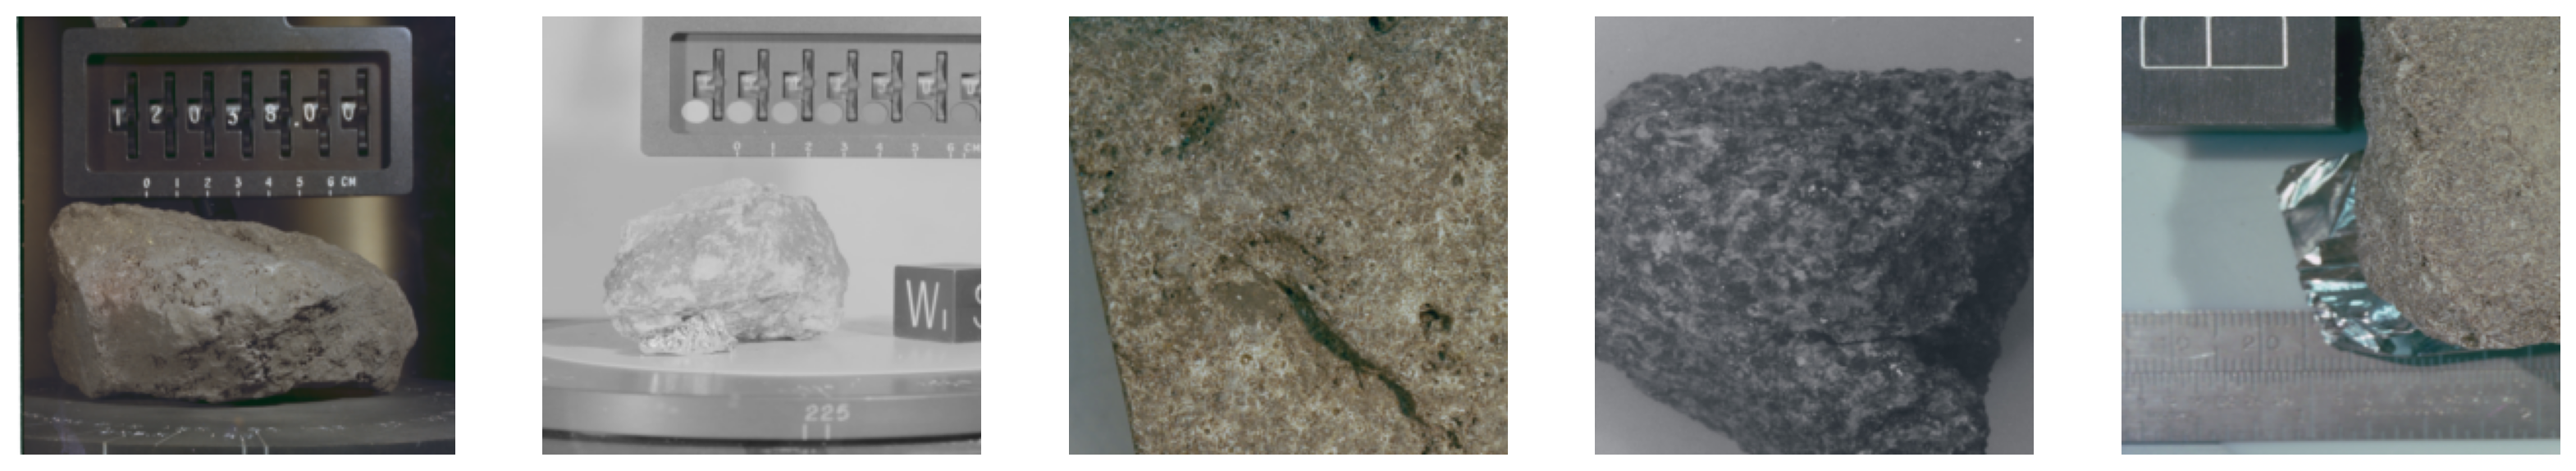

In [9]:
# Show five images - you can change this number
images, labels = get_random_images(5)

# Convert the array of pixels to an image
to_pil = transforms.ToPILImage()
fig=plt.figure(figsize=(20,20))

# Get a list of all classes in the training data
classes=trainloader.dataset.classes

# Draw the images in a plot to display in the notebook
for ii in range(len(images)):
    image = to_pil(images[ii])
    sub = fig.add_subplot(1, len(images), ii+1)
    plt.axis('off')
    plt.imshow(image)

# Display all of the images 
plt.show()

In [10]:
# Determine if you're using a CPU or a GPU device to build the deep learning network
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)

/opt/anaconda3/envs/sprk/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/anaconda3/envs/sprk/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /Users/giuseppesinatra/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100.0%


In [11]:
# Build all the neurons
for param in model.parameters():
     param.requires_grad = False

# Wire the neurons together to create the neural network
model.fc = nn.Sequential(nn.Linear(2048, 512),
                               nn.ReLU(),
                               nn.Dropout(0.2),
                               nn.Linear(512, 2),
                               nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)

# Add the neural network to the device
model.to(device)

print('done')

done


In [20]:
# Set the initial number of iterations to search for associations
epochs = 10
print_every = 5

# Initialize the loss variables
running_loss = 0
train_losses, test_losses = [], []

# Track the current training step, start at 0
steps = 0

# Search for associations in the features
for epoch in range(epochs):

   # Count each epoch
   epoch += 1

   # Load in all of the image inputs and labels from the TRAIN loader 
   for inputs, labels in trainloader:

      # Count each training step
      steps += 1
      print('Training step ', steps)

      # Load the inputs and labels to the already selected device
      inputs, labels = inputs.to(device), labels.to(device)

      # Zero out gradients to avoid accumulations of gradiants across training iterations
      optimizer.zero_grad()

      # Pass the images through the model, return the log probabilities of each label
      logps = model.forward(inputs)

      # Run the log probabilities through the criterion to get the output graph
      loss = criterion(logps, labels)

      # Use the loss graph to compute gradients
      loss.backward()

      # Update the parameters based on the current gradient
      optimizer.step()

      # Add the actual loss number to the running loss total
      running_loss += loss.item()

      # Every 5 steps, evaluate the model
      if steps % print_every == 0:

         # Initialize loss and accuracy
         test_loss = 0
         accuracy = 0

         # Start the model evaluation
         model.eval()

         # Refine the accuracy of the prediction without updating the gradients
         with torch.no_grad():

            # Load in all of the image inputs and labels from the TEST loader 
            for inputs, labels in testloader:

               # Load the inputs and labels to the already selected device
               inputs, labels = inputs.to(device), labels.to(device)

               # Pass the images through the model, return the log probabilities of each label
               logps = model.forward(inputs)

               # Run the log probabilities through the criterion to get the output graph
               batch_loss = criterion(logps, labels)

               # Add the actual loss number to the running loss total for the test batch
               test_loss += batch_loss.item()

               # Return a new tensor with the true probabilities
               ps = torch.exp(logps)

               # Return the largest probability and class of the new tensor along a given dimension
               top_p, top_class = ps.topk(1, dim=1)

               # Reshape the tensor to match the same shape as the top class
               equals = top_class == labels.view(*top_class.shape)

               # Compute the accuracy and add it to the running accuracy count for the test batch
               accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

         # Append the training and testing losses
         train_losses.append(running_loss/len(trainloader))
         test_losses.append(test_loss/len(testloader))  

         # Display the accuracy of the prediction with 3 digits in the fractional part of the decimal
         print(f"\n     Epoch {epoch}/{epochs}: "
               f"Train loss: {running_loss/print_every:.3f}.. "
               f"Test loss: {test_loss/len(testloader):.3f}.. "
               f"Test accuracy: {accuracy/len(testloader):.3f}\n")

         # Train the model
         running_loss = 0
         model.train()

         # After 5 training steps, start the next epoch
         # Break here in case the trainloader has remaining data
         break

Training step  1
Training step  2
Training step  3
Training step  4
Training step  5

     Epoch 1/10: Train loss: 0.234.. Test loss: 0.402.. Test accuracy: 0.773

Training step  6
Training step  7
Training step  8
Training step  9
Training step  10

     Epoch 2/10: Train loss: 0.157.. Test loss: 0.330.. Test accuracy: 0.810

Training step  11
Training step  12
Training step  13
Training step  14
Training step  15

     Epoch 3/10: Train loss: 0.246.. Test loss: 0.243.. Test accuracy: 0.969

Training step  16
Training step  17
Training step  18
Training step  19
Training step  20

     Epoch 4/10: Train loss: 0.224.. Test loss: 0.353.. Test accuracy: 0.838

Training step  21
Training step  22
Training step  23
Training step  24
Training step  25

     Epoch 5/10: Train loss: 0.193.. Test loss: 0.313.. Test accuracy: 0.869

Training step  26
Training step  27
Training step  28
Training step  29
Training step  30

     Epoch 6/10: Train loss: 0.307.. Test loss: 0.351.. Test accuracy: 0.

In [21]:
print(accuracy/len(testloader))

0.8041666746139526


In [22]:
torch.save(model, 'aerialmodel.pth')

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('aerialmodel.pth')

Next, we create a function to predict the type of rock in a new image by comparing it against our model's matrix pattern

In [24]:
def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

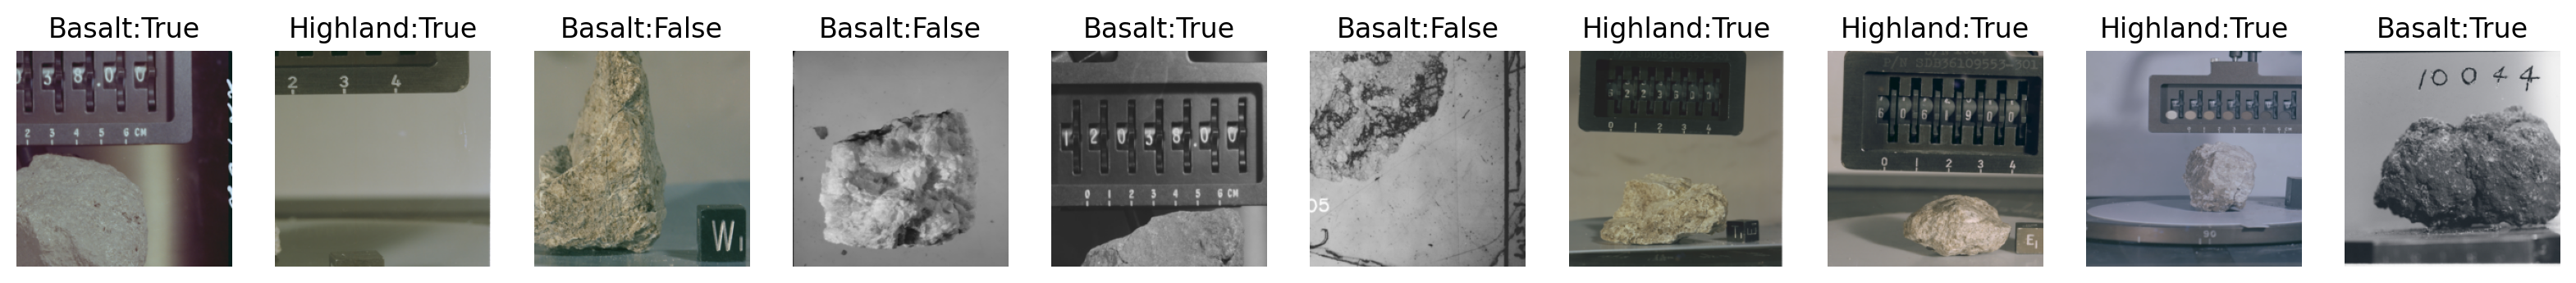

In [25]:
# Get five random images and display them in a figure with their labels
to_pil = transforms.ToPILImage()
images, labels = get_random_images(10)
fig=plt.figure(figsize=(20,10))

# Load all of the classes from the training loader
classes=trainloader.dataset.classes

# Loop through the 5 randomly selected images
for ii in range(len(images)):

    # Predict the class of each image
    image = to_pil(images[ii])
    index = predict_image(image)

    # Add the class to the plot graph to display beneath the image
    sub = fig.add_subplot(1, len(images), ii+1)
    res = int(labels[ii]) == index
    sub.set_title(str(classes[index]) + ":" + str(res))
    plt.axis('off')
    plt.imshow(image)

# Reshow the plot with the predicted labels beneath the images
plt.show()